### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

### masks

In [4]:
mm_rg = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_krg.nc')
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
mm_rg = xr.open_dataset(savenam)
tmask = mm_rg.tmask

mm_med = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask_eORCA1_wrk.nc')
mm_med['area'] = mm_med.tmask[0,:,:] * mm_med.e1t[:,:] * mm_med.e2t[:,:]

mm_tom = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
mm_tom['area'] = mm_tom.tmask[0,0,:,:] * mm_tom.e1t[0,:,:] * mm_tom.e2t[0,:,:]

print(np.nansum(mm_tom.area.values))
print(np.nansum(mm_med.area.values))
print(np.nansum(mm_rg.tmask[:,:].values))

print('ukesm lats')
print(mm_med['nav_lat'][0:114,0])
print('tom lats')
print(mm_tom['nav_lat'][0:37,0])

360890792804973.06
365514208750225.2
378756194791643.8
ukesm lats
<xarray.DataArray 'nav_lat' (y: 114)>
array([-84.21071 , -84.108955, -84.005424, -83.90008 , -83.79289 , -83.68382 ,
       -83.572845, -83.45993 , -83.34504 , -83.22814 , -83.1092  , -82.988174,
       -82.865036, -82.739746, -82.612274, -82.48257 , -82.3506  , -82.21633 ,
       -82.07972 , -81.94073 , -81.79932 , -81.65543 , -81.50905 , -81.360115,
       -81.20859 , -81.05442 , -80.89758 , -80.73801 , -80.57567 , -80.4105  ,
       -80.24247 , -80.071526, -79.89762 , -79.720695, -79.54071 , -79.357605,
       -79.17133 , -78.98184 , -78.78908 , -78.59298 , -78.3935  , -78.19058 ,
       -77.98417 , -77.7742  , -77.56062 , -77.34337 , -77.12238 , -76.89761 ,
       -76.66898 , -76.43644 , -76.19991 , -75.95934 , -75.71467 , -75.46582 ,
       -75.21273 , -74.95534 , -74.693565, -74.42735 , -74.156624, -73.88131 ,
       -73.60134 , -73.31665 , -73.02715 , -72.73279 , -72.43347 , -72.129135,
       -71.8197  , -71.5051

## tom's mldr10_1 and UKESM somxl010 are the same thing, good work on nomenclature everyone

In [5]:
w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_1AA3/ORCA2_1m_20120101_20121231_grid_T.nc')
w.somxl030
w.mldr10_1

<xarray.DataArray 'mldr10_1' (time_counter: 12, y: 149, x: 182)>
[325416 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  (time_counter) object ...
  * time_counter   (time_counter) object 2012-01-16 12:00:00 ... 2012-12-16 1...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_theta
    long_name:           Mixed Layer Depth (dsigma = 0.01 wrt 10m)
    units:               m
    online_operation:    average
    interval_operation:  5760 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 5760 s)

In [6]:
w = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/ukesm_allscen_gridT_mld/nemo_scen_3B_1m_20900101-20900201_grid-T.nc')
w.somxl010

<xarray.DataArray 'somxl010' (time_counter: 1, y: 332, x: 362)>
[120184 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  (time_counter) object ...
  * time_counter   (time_counter) float64 0.0
Dimensions without coordinates: y, x
Attributes:
    standard_name:       ocean_mixed_layer_thickness_defined_by_sigma_theta
    long_name:           Mixed Layer Depth (dsigma = 0.01 wrt 10m)
    units:               m
    online_operation:    average
    interval_operation:  2700 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 2700 s)
    cell_measures:       area: area

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


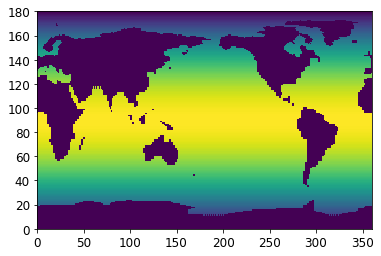

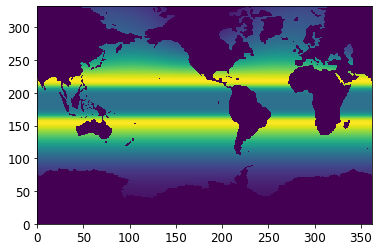

In [7]:
plt.figure()
plt.pcolormesh(mm_rg.tmask[:,:])

plt.figure()
plt.pcolormesh(mm_med.area[:,:])

In [8]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


In [9]:
ex = False
if ex:
    scens = ['1A','1B','2A','2B','3A','3B']

    yr = 1950; yre = 2099

    for s in range(0,6):
        print(scens[s])
        
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./extracted-summary/SST_ukesm_{scens[s]}.nc'
        print(savenam)
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            


            tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/ukesm_allscen_gridT_TS/'
            w = xr.open_dataset(f'{tdir}/nemo_scen_{scens[s]}_1m_{y}_fy_grid-T.nc')
            tmld = w.isel(deptht=0).sel(y=slice(0,114)).weighted(mm_med['area'].sel(y=slice(0,114))).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.thetao.values
            ind = ind+12


        data_vars = {'tos':(['time_counter'], vals,
        {'units': 'degC',
        'long_name':'SST'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'SOZONE/windAnalyis/oceanFields/SST.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)
        plt.plot(ds.time_counter, ds.tos)

In [10]:
ex = False
if ex:
    scens = ['1A','1B','2A','2B','3A','3B']

    yr = 1950; yre = 2099

    for s in range(0,6):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./extracted-summary/SST_tom_{scens[s]}A6.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{scens[s]}A6/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_grid_T.nc')
            tmld = w.tos.sel(y=slice(0,37)).weighted(mm_tom['area'].sel(y=slice(0,37))).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'tos':(['time_counter'], vals,
        {'units': 'degC',
        'long_name':'SST'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'SOZONE/windAnalyis/oceanFields/SST.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)


In [11]:
ex = True
if ex:
    scens = ['1A','1B','2A','2B','3A','3B']

    yr = 1950; yre = 2099

    for s in range(0,6):
        print(scens[s])
        times = pd.date_range(f"{yr}/01/01",f"{yre+1}/01/01",freq='MS',closed='left')
        print(len(times))
        savenam = f'./extracted-summary/SST_tom_{scens[s]}A7.nc'
        ind = 0
        vals = np.zeros(len(times))
        for y in range(yr,yre+1):
            if (y%30 == 0):
                print(y)
            tdir = f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{scens[s]}A7/'
            w = xr.open_dataset(f'{tdir}ORCA2_1m_{y}0101_{y}1231_grid_T.nc')
            tmld = w.tos.sel(y=slice(0,37)).weighted(mm_tom['area'].sel(y=slice(0,37))).mean(dim = ['x','y'])
            vals[ind:ind+12] = tmld.values
            ind = ind+12


        data_vars = {'tos':(['time_counter'], vals,
        {'units': 'degC',
        'long_name':'SST'}),
        }
        # define coordinates
        coords = {'time_counter': (['time_counter'], times),
                }
        # define global attributes
        attrs = {'made in':'SOZONE/windAnalyis/oceanFields/SST.ipynb',
        'desc': ''
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)


1A
1800
1950
1980
2010
2040
2070
1B
1800
1950
1980
2010
2040
2070
2A
1800
1950
1980
2010
2040
2070
2B
1800
1950
1980
2010
2040
2070
3A
1800
1950
1980
2010
2040
2070
3B
1800
1950
1980
2010
2040
2070


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

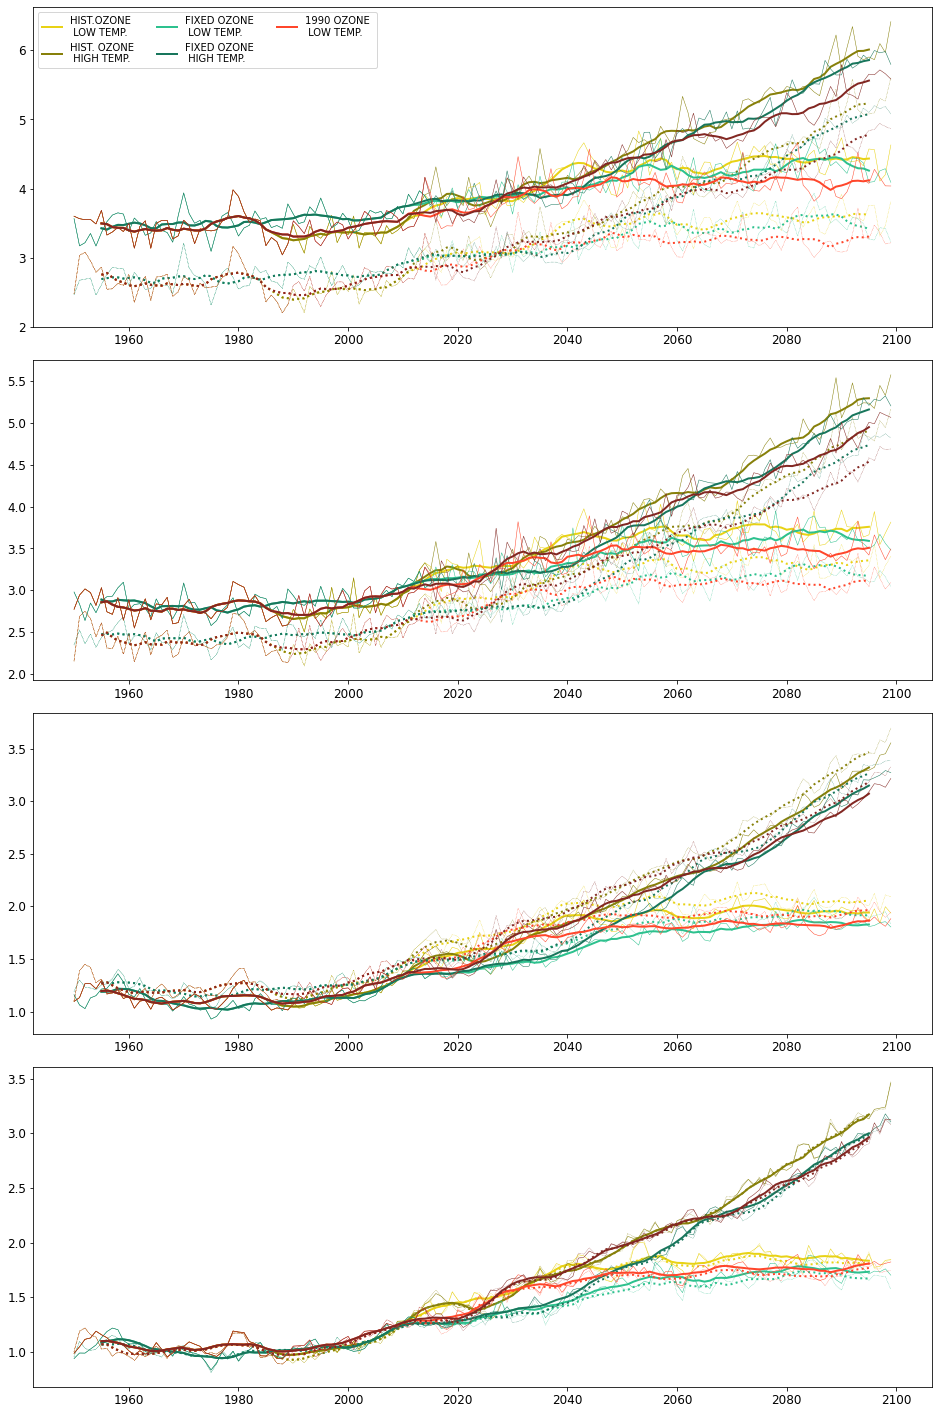

In [12]:
plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

seas = ['DJF','MAM','JJA','SON']
    
fact = 1.1
fig, axs = plt.subplots(4,1, figsize=(12*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for m in range(0,6):#len(models)):
    
    tmod = xr.open_dataset(f'./extracted-summary/SST_ukesm_{models[m]}.nc')
    for i in range(0,4):
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[i].plot(tv.year,tv.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 0.5)            
            axs[i].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'],\
                        linestyle = ':', linewidth = 2)
            axs[0].legend(ncol = 3, fontsize = 10)            
        
    tmod = xr.open_dataset(f'./extracted-summary/SST_tom_{models[m]}A6.nc')
    for i in range(0,4):
            tpl = tmod.sel(time_counter=(tmod['time_counter.season'] == seas[i]))
            tv = tpl.groupby('time_counter.year').mean()
            tv_rol = tv.rolling(year=10, center=True).mean()
            axs[i].plot(tv.year,tv.tos, color = mod[models[m]]['color'], \
                        linestyle = '-', linewidth = 0.5)            
            axs[i].plot(tv_rol.year,tv_rol.tos, color = mod[models[m]]['color'], label = mod[models[m]]['name'],\
                        linestyle = '-', linewidth = 2)


plt.tight_layout()